# Part 5 : Data Manipulation (Basic)
- Merge
- Concatenate datasets
- Transpose
- Remove the duplicate records

## Merging files
use panda.merge to merage two dataframes. panda merge function can merge two data frames at a time. 
- inner join
- outer join
- left join
- right join

In [1]:
### Import packages
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import xport  ## write sas datasets to local drive

In [2]:
raw1 = {'subjid': ['01-001', '01-002', '01-003', '01-004'],
        'age': [35, 44, 66, np.NaN],
        'sex': ['M','F','F','M']
       }
df1 = pd.DataFrame(raw1)
print(df1)
print("type of np.NaN: ", type(df1.loc[3,'age']))

   subjid   age sex
0  01-001  35.0   M
1  01-002  44.0   F
2  01-003  66.0   F
3  01-004   NaN   M
type of np.NaN:  <class 'numpy.float64'>


In [3]:
raw2 = {'subjid': ['01-001', '01-002', '01-003', '01-005'],
        'dsterm': ['COMPLETED', 'LOST TO FOLLOW-UP', 'COMPLETED','DISCONTINUED'],
       }
df2 = pd.DataFrame(raw2)
print(df2)

   subjid             dsterm
0  01-001          COMPLETED
1  01-002  LOST TO FOLLOW-UP
2  01-003          COMPLETED
3  01-005       DISCONTINUED


### Inner Join

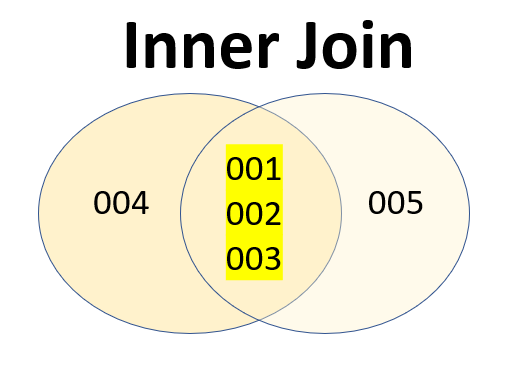

In [4]:
## merge data frames on(by) and default of inner join. 
df_merged1 = pd.merge(df1, df2, on='subjid')
print("Innder Join : \n", df_merged1)

Innder Join : 
    subjid   age sex             dsterm
0  01-001  35.0   M          COMPLETED
1  01-002  44.0   F  LOST TO FOLLOW-UP
2  01-003  66.0   F          COMPLETED


### Outer Join

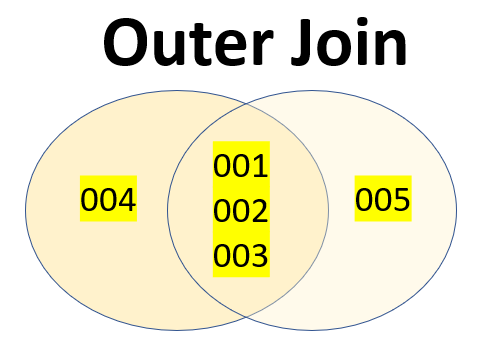

In [5]:
## merge data frames on(by) and outer join. 
df_merged2 = pd.merge(df1, df2, on='subjid', how='outer')
print("Outer join : \n", df_merged2)  ## note that Null values (NaN) are included.  

Outer join : 
    subjid   age  sex             dsterm
0  01-001  35.0    M          COMPLETED
1  01-002  44.0    F  LOST TO FOLLOW-UP
2  01-003  66.0    F          COMPLETED
3  01-004   NaN    M                NaN
4  01-005   NaN  NaN       DISCONTINUED


### Left Join

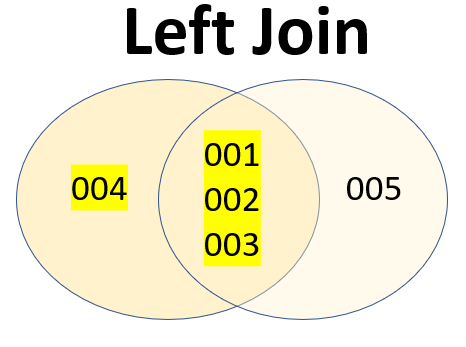

In [6]:
## merge data frames on(by) and left join. 
df_merged3 = pd.merge(df1, df2, on='subjid', how='left')
print("Left join : \n", df_merged3)  ## note that Null values (NaN) are included.  

Left join : 
    subjid   age sex             dsterm
0  01-001  35.0   M          COMPLETED
1  01-002  44.0   F  LOST TO FOLLOW-UP
2  01-003  66.0   F          COMPLETED
3  01-004   NaN   M                NaN


### Right Join

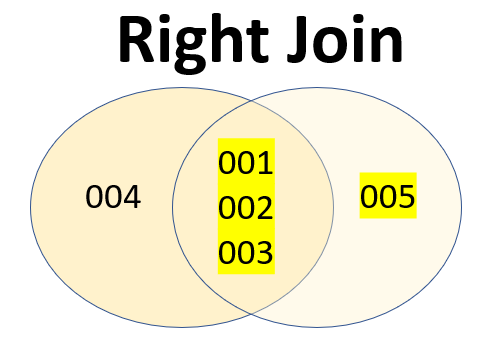

In [7]:
## merge data frames on(by) and right join. 
df_merged4 = pd.merge(df1, df2, on='subjid', how='right')
print("Right join : \n", df_merged4)  ## note that Null values (NaN) are included.  

Right join : 
    subjid   age  sex             dsterm
0  01-001  35.0    M          COMPLETED
1  01-002  44.0    F  LOST TO FOLLOW-UP
2  01-003  66.0    F          COMPLETED
3  01-005   NaN  NaN       DISCONTINUED


### Merge with two key variables

In [8]:
raw3 = {'subjid': ['01-001', '01-001', '01-002', '01-002'],
        'visitnum': [1,2,1,2],
        'blood pressure': ['150','151','146','145']
       }
df3 = pd.DataFrame(raw3)
print(df3)

   subjid  visitnum blood pressure
0  01-001         1            150
1  01-001         2            151
2  01-002         1            146
3  01-002         2            145


In [9]:
## prepare raw data - not sorted
raw4 = {'subjid': ['01-001', '01-001', '01-002', '01-002'],
        'visitnum': [1,2,2,1],
        'weight': ['180','181','160','158']
       }
df4 = pd.DataFrame(raw4)
print(df4)

   subjid  visitnum weight
0  01-001         1    180
1  01-001         2    181
2  01-002         2    160
3  01-002         1    158


In [10]:
## Merge by two key variables
df_merged_2 = pd.merge(df3, df4, on=('subjid', 'visitnum')) ## merging by two columns. Data does not need to be sorted
print(df_merged_2)

   subjid  visitnum blood pressure weight
0  01-001         1            150    180
1  01-001         2            151    181
2  01-002         1            146    158
3  01-002         2            145    160


## Reshape the data
- Concatenating multiple dataframe
- Transposing dataframe

### Concatenating multiple dataframes

In [11]:
## Adding together
df_add = pd.concat([df1,df2])
print(df_add)

   subjid   age  sex             dsterm
0  01-001  35.0    M                NaN
1  01-002  44.0    F                NaN
2  01-003  66.0    F                NaN
3  01-004   NaN    M                NaN
0  01-001   NaN  NaN          COMPLETED
1  01-002   NaN  NaN  LOST TO FOLLOW-UP
2  01-003   NaN  NaN          COMPLETED
3  01-005   NaN  NaN       DISCONTINUED


### Transposing DataFrame

In [12]:
## Transposing data to vertical - use pd.melt
raw5 = {'subjid': ['01-001', '01-002', '01-003', '02-001'],
      'sysbp': [154, 152, 148, 149],
      'diabp': [44, 48, 47, 50],
      'weight': [90.5, 83, 78, 77]} ## dicionary
df5 = DataFrame(raw5)
print("Original data frame : \n", df5)

df5_2 = df5[['subjid','diabp','sysbp','weight']] ## reorder columns
print("\nReorderded data frame: \n", df5_2)

df_tran = pd.melt(df5_2, id_vars='subjid', value_vars=['diabp', 'sysbp','weight'])
print("\nTransposed data frame : \n", df_tran)

df_tran2 = df_tran.rename(columns={'variable':'paramcd', 'value':'aval'})
print("\nRenamed columns : \n", df_tran2)

Original data frame : 
    subjid  sysbp  diabp  weight
0  01-001    154     44    90.5
1  01-002    152     48    83.0
2  01-003    148     47    78.0
3  02-001    149     50    77.0

Reorderded data frame: 
    subjid  diabp  sysbp  weight
0  01-001     44    154    90.5
1  01-002     48    152    83.0
2  01-003     47    148    78.0
3  02-001     50    149    77.0

Transposed data frame : 
     subjid variable  value
0   01-001    diabp   44.0
1   01-002    diabp   48.0
2   01-003    diabp   47.0
3   02-001    diabp   50.0
4   01-001    sysbp  154.0
5   01-002    sysbp  152.0
6   01-003    sysbp  148.0
7   02-001    sysbp  149.0
8   01-001   weight   90.5
9   01-002   weight   83.0
10  01-003   weight   78.0
11  02-001   weight   77.0

Renamed columns : 
     subjid paramcd   aval
0   01-001   diabp   44.0
1   01-002   diabp   48.0
2   01-003   diabp   47.0
3   02-001   diabp   50.0
4   01-001   sysbp  154.0
5   01-002   sysbp  152.0
6   01-003   sysbp  148.0
7   02-001   sysbp  149

In [13]:
## Transposing data to horizontal
df_tran2.sort_values(by=['subjid','paramcd'], inplace=True)
df_tran3 = pd.pivot_table(df_tran2, values='aval', columns=['paramcd'], index=['subjid'])
print("Before Transposing : \n", df_tran2)
print("Transposed data : \n", df_tran3)
print("Its columns : ", df_tran3.columns)
print("Its indexes : ",df_tran3.index)

## reset_index() will move subjid from index to column
## rename_axis(None, axis=1) will remove columns name in index
df_tran4 = df_tran3.reset_index().rename_axis(None, axis=1) 
print("\nResetted index data : \n", df_tran4)
print("Its columns : ",df_tran4.columns)
print("Its index : ",df_tran4.index)

Before Transposing : 
     subjid paramcd   aval
0   01-001   diabp   44.0
4   01-001   sysbp  154.0
8   01-001  weight   90.5
1   01-002   diabp   48.0
5   01-002   sysbp  152.0
9   01-002  weight   83.0
2   01-003   diabp   47.0
6   01-003   sysbp  148.0
10  01-003  weight   78.0
3   02-001   diabp   50.0
7   02-001   sysbp  149.0
11  02-001  weight   77.0
Transposed data : 
 paramcd  diabp  sysbp  weight
subjid                       
01-001    44.0  154.0    90.5
01-002    48.0  152.0    83.0
01-003    47.0  148.0    78.0
02-001    50.0  149.0    77.0
Its columns :  Index(['diabp', 'sysbp', 'weight'], dtype='object', name='paramcd')
Its indexes :  Index(['01-001', '01-002', '01-003', '02-001'], dtype='object', name='subjid')

Resetted index data : 
    subjid  diabp  sysbp  weight
0  01-001   44.0  154.0    90.5
1  01-002   48.0  152.0    83.0
2  01-003   47.0  148.0    78.0
3  02-001   50.0  149.0    77.0
Its columns :  Index(['subjid', 'diabp', 'sysbp', 'weight'], dtype='object')


### Remove the duplicate records

In [14]:
## Removing duplicate records
raw6 = {'subjid': ['01-001', '01-001', '01-001', '01-001'],
        'visitnum': [1,2,2,3],
        'weight': ['180','181','160','158']
       }
df6 = pd.DataFrame(raw6)
print("Data with duplicated records: \n", df6)

df_dup = df6.drop_duplicates(subset=['subjid','visitnum']) # proc sort data=df6 out=df_dup nodupkey; by subjid visitnum; run;
print("\nRemoving duplicated records: \n", df_dup) # note that first row is kept. Need to sort accordingly.

Data with duplicated records: 
    subjid  visitnum weight
0  01-001         1    180
1  01-001         2    181
2  01-001         2    160
3  01-001         3    158

Removing duplicated records: 
    subjid  visitnum weight
0  01-001         1    180
1  01-001         2    181
3  01-001         3    158
